In [1]:
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import Flatten, LSTM
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input
# from tensorflow.keras.layers.merge import Concatenate
from tensorflow.keras.optimizers import Adam

import pandas as pd
import numpy as np
import re
import string

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/hp/Downloads/NLP/train.csv")

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15268668352571682726
xla_global_id: -1
]


In [5]:
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [6]:
print(df.shape)

(159571, 8)


In [7]:
filter=df['comment_text']!=""
df=df[filter]
df=df.dropna()

In [8]:
def preprocess_text(sen):
  sen =sen.lower()
  sen=sen.translate(str.maketrans('','',string.punctuation))
  sen = re.sub('[^a-zA-Z]', ' ', sen)
  sen = re.sub(r'\s+[a-zA-Z]\s+', ' ', sen)
  sen = re.sub(r'\s+', ' ', sen)

  return sen



In [9]:
X=[]
sentences=list(df['comment_text'])
for sen in sentences:
  X.append(preprocess_text(sen))

In [10]:
toxic= np.sum(df[['toxic','severe_toxic','obscene','threat','insult','identity_hate']],axis=1)>0  # Sum of row wise data with these labels if any has 1 there sum>0 thus toxic = True , new feature

In [11]:
toxic.value_counts()  # No of toxic and non toxic comments

False    143346
True      16225
Name: count, dtype: int64

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

In [13]:
my_stopwords=stopwords.words('english')

In [14]:
# Glove Word embeddings

from numpy import array
from numpy import asarray
from numpy import zeros

In [ ]:
embeddings_dictionary = dict()
glove_file = open('C:/Users/hp/Downloads/NLP/glove.2024.wikigiga.100d/glovetext.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

In [16]:
embeddings_dictionary['king']     # Word embedding from pretrained GloVe

array([-0.138498, -0.44551 , -0.079252,  0.063923, -0.31674 , -0.097429,
        0.20663 ,  0.438389,  0.294288,  0.034275,  0.223931, -0.284049,
       -0.798358,  0.193388, -0.227808,  0.597323, -0.465254,  0.930116,
       -0.736697,  0.162823,  0.926296, -0.781003,  1.004846,  0.358677,
        0.960023,  1.45482 ,  0.505604,  0.104642,  0.886117,  0.200715,
       -0.160491,  0.275891, -0.475905,  1.350047, -3.116687,  0.485153,
       -0.393411, -0.095384, -0.088049,  0.113747,  0.039471,  0.163316,
        0.321013,  0.634655, -0.218195,  0.876308,  0.390325, -0.811509,
        2.538277, -0.35403 ,  0.888017, -0.490899,  0.469639,  0.280377,
        0.085126, -0.017109, -0.435259,  0.426419, -0.242218, -0.48224 ,
       -0.18669 ,  0.144029, -0.093616, -1.529537,  0.909999, -0.490671,
        0.675325, -0.268724, -0.113896, -0.332528, -0.128698, -0.200044,
        0.535551, -0.537814, -0.335244,  0.043375,  0.269329, -0.694638,
        0.273521,  0.332704,  0.461466, -0.557824, 

In [17]:
# Similarity b/w 2 words
embeddings_dictionary['king'].dot(embeddings_dictionary['queen'])/(np.sqrt(embeddings_dictionary['king'].dot(embeddings_dictionary['king']) * embeddings_dictionary['queen'].dot(embeddings_dictionary['queen'])))

0.75474423

# **Vectorizing the text**

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(stop_words=my_stopwords)
bag_of_words=vectorizer.fit_transform(X)

In [20]:
print("Sparsity of bag_of_words:",
      len(bag_of_words.data)/(bag_of_words.shape[0]*bag_of_words.shape[1])*100)  # Very sparse data as very large vocab

Sparsity of bag_of_words: 0.012287770561004727


In [21]:
list(vectorizer.vocabulary_.keys())

['explanation',
 'edits',
 'made',
 'username',
 'hardcore',
 'metallica',
 'fan',
 'reverted',
 'werent',
 'vandalisms',
 'closure',
 'gas',
 'voted',
 'new',
 'york',
 'dolls',
 'fac',
 'please',
 'dont',
 'remove',
 'template',
 'talk',
 'page',
 'since',
 'im',
 'retired',
 'daww',
 'matches',
 'background',
 'colour',
 'seemingly',
 'stuck',
 'thanks',
 'january',
 'utc',
 'hey',
 'man',
 'really',
 'trying',
 'edit',
 'war',
 'guy',
 'constantly',
 'removing',
 'relevant',
 'information',
 'talking',
 'instead',
 'seems',
 'care',
 'formatting',
 'actual',
 'info',
 'cant',
 'make',
 'real',
 'suggestions',
 'improvement',
 'wondered',
 'section',
 'statistics',
 'later',
 'subsection',
 'types',
 'accidents',
 'think',
 'references',
 'may',
 'need',
 'tidying',
 'exact',
 'format',
 'ie',
 'date',
 'etc',
 'noone',
 'else',
 'first',
 'preferences',
 'style',
 'want',
 'let',
 'know',
 'appears',
 'backlog',
 'articles',
 'review',
 'guess',
 'delay',
 'reviewer',
 'turns',
 'l

In [22]:
len(bag_of_words.data)

4393874

In [23]:
print(bag_of_words.shape, len(vectorizer.vocabulary_))

(159571, 224089) 224089


In [24]:
embed=[]
zeros_embed=100*[0]
for key,val in sorted(vectorizer.vocabulary_.items(),key = lambda kv:(kv[1], kv[0])):
  if key in embeddings_dictionary:
    embed.append(embeddings_dictionary[key])
  else:
    embed.append(zeros_embed)
  if val%1000==0:
    print(val,key)

0 aa
1000 acceptible
2000 addingediting
3000 aesthetic
4000 ahead
5000 aldrinapollo
6000 alphachim
7000 amp
8000 ankylosaurus
9000 antiquary
10000 applicationxml
11000 arggggghhhhhhhhhhh
12000 artististic
13000 asta
14000 australiaclasscatperthwayes
15000 azeriturkish
16000 balk
17000 baseballman
18000 bedfellows
19000 berchtesgaden
20000 bient
21000 blackguards
22000 bmjm
23000 borked
24000 breakdances
25000 brutaldeluxe
26000 burnt
27000 callas
28000 caramixed
29000 categoryassassination
30000 cdd
31000 chamiirs
32000 chesham
33000 chronologies
34000 clarmont
35000 coattails
36000 combs
37000 complimentnow
38000 connonlleyif
39000 contributionssafesubstif
40000 corresponds
41000 cpyright
42000 cronationalism
43000 curbs
44000 damacy
45000 dchmelik
46000 defenceman
47000 delinquently
48000 descriptionist
49000 diahoreea
50000 diper
51000 displacing
52000 documenting
53000 doulas
54000 dsouza
55000 ealiest
56000 editsum
57000 elegantly
58000 enablers
59000 enthusiasts
60000 esarevi
610

## **Why need Sparse Matrix ?**

Memory efficiency

Embedding matrices can get huge if your vocabulary is large (10k–100k words).

Many words (especially if using TF-IDF) may have embeddings of zeros (like missing words).

Sparse representation only stores non-zero elements, saving memory.

Compatibility with scikit-learn

TF-IDF or CountVectorizer output is a sparse matrix.

Some ML pipelines expect sparse input, so converting embeddings to sparse can simplify integration.

Faster operations on sparse data

Matrix multiplication, dot products, etc., can be faster when most elements are zero.

In [ ]:
import scipy.sparse as sparse


In [25]:
import numpy as np
embed_dim = 100

embed = []
zeros_embed = np.zeros(embed_dim, dtype='float32')

for key, val in sorted(vectorizer.vocabulary_.items(), key=lambda kv: (kv[1], kv[0])):

    word_vector = embeddings_dictionary.get(key)

    if word_vector is not None:
        try:
            vector_np = np.asarray(word_vector, dtype='float32')

            # 2. Check its shape
            if vector_np.shape == (embed_dim,):
                embed.append(vector_np) 
            else:
                embed.append(zeros_embed)
        except ValueError:
            embed.append(zeros_embed)
    else:
        embed.append(zeros_embed)


embedding_matrix = np.array(embed)

print("Successfully created embedding matrix.")
print(embedding_matrix.shape)

Successfully created embedding matrix.
(224089, 100)


In [26]:
# Generating the document embedding for the document

doc_embeds = bag_of_words.dot(embedding_matrix)

In [27]:
doc_embeds.shape

(159571, 100)

In [28]:
# Model training
X_train,X_test,y_train,y_test=train_test_split(doc_embeds,toxic,test_size =0.20,random_state=42)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay

In [30]:
lr=LogisticRegression()
dt=DecisionTreeClassifier(max_depth=25)
rf=RandomForestClassifier(max_depth=15,n_estimators=40)    # 40 trees in RF
svc=SVC(kernel='linear',gamma='auto',degree=2)

In [31]:
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)

,n_estimators,40
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


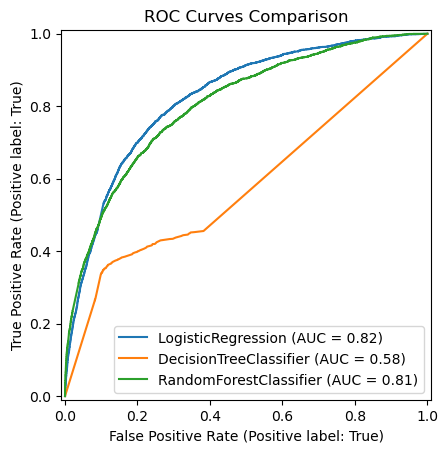

In [32]:
disp = RocCurveDisplay.from_estimator(lr,X_test,y_test)
RocCurveDisplay.from_estimator(dt,X_test,y_test,ax=disp.ax_)
RocCurveDisplay.from_estimator(rf,X_test,y_test,ax=disp.ax_)
#plot_roc_curve(clf,X_test,y_test,ax=disp.ax_)
plt.title("ROC Curves Comparison")
plt.show()

# Decision tree classifier isnt performing well at all here. Random forest has a little less area compared to Logistic regression

## **Neural Network**

In [34]:
# Random neural architecture
# Multi layered Perceptron

from tensorflow.keras import  regularizers
maxlen=100
l1_thres=1e-4                           # Regularization threshold constants
l2_thres = 1e-5 
deep_inputs = Input(shape=(maxlen,))  # Input - 100 dimension document embedding
dense_layer_1= Dense(128,activation='tanh',kernel_regularizer=regularizers.l1_l2(l1=l1_thres, l2=l2_thres))(deep_inputs)
dense_layer_2 = Dense(64, activation='tanh',kernel_regularizer=regularizers.l1_l2(l1=l1_thres, l2=l2_thres))(dense_layer_1)
dense_layer_3 = Dense(32, activation='tanh',kernel_regularizer=regularizers.l1_l2(l1=l1_thres, l2=l2_thres))(dense_layer_2)
dense_layer_4 = Dense(16, activation='tanh',kernel_regularizer=regularizers.l1_l2(l1=l1_thres, l2=l2_thres))(dense_layer_3)
dense_layer_5 = Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l1_l2(l1=l1_thres, l2=l2_thres))(dense_layer_4)
model = Model(inputs=deep_inputs, outputs=dense_layer_5)
opt=Adam()
model.compile(loss='binary_crossentropy',optimizer = opt,metrics=['acc'])

In [35]:
print(model.summary())     # Params : No of parameters to be learn at each layer

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          12,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,809 (93.00 KB)

 Trainable params: 23,809 (93.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [36]:
X_res=X_train # Converting training data to dense matrix which is required if its sparse
y_res=y_train


In [37]:
history = model.fit(X_res, y_res, batch_size=256, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9014 - loss: 0.4236 - val_acc: 0.9049 - val_loss: 0.3656
Epoch 2/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9048 - loss: 0.3422 - val_acc: 0.9037 - val_loss: 0.3197
Epoch 3/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9045 - loss: 0.3127 - val_acc: 0.9049 - val_loss: 0.2988
Epoch 4/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9050 - loss: 0.2954 - val_acc: 0.9048 - val_loss: 0.2862
Epoch 5/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9048 - loss: 0.2856 - val_acc: 0.9057 - val_loss: 0.2777
Epoch 6/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9057 - loss: 0.2773 - val_acc: 0.9056 - val_loss: 0.2720
Epoch 7/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9056 - loss: 0.2731 - val_acc: 0.9055 - val_loss: 0.2692
Epoch 8/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9060 - loss: 0.2689 - val_acc: 0.9064 - val_loss: 0.2643
Epoch 9/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - ac

In [38]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix
from tensorflow.keras import Model

def conf(my_model,thres,test_data,test_y):
    if isinstance(my_model,Model):         # checks if the my_model provided is a TensorFlow/Keras Model
        output = my_model.predict(test_data)
    else:
        output = my_model.predict_proba(test_data)[:,list(my_model.classes_).index(True)]
    pred = (output>thres)
    return confusion_matrix(test_y, pred)   
        

In [46]:
conf(model,0.5,X_test,y_test)    # Neural model  # Threshold of 0.5 , may not be the best threshold

998/998 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step


array([[28429,   242],
       [ 2773,   471]], dtype=int64)

In [40]:
conf(lr,0.5,X_test,y_test)   # Logistic Model

array([[28448,   223],
       [ 2908,   336]], dtype=int64)

In [41]:
conf(rf,0.5,X_test,y_test)    # Random forest Model

array([[28578,    93],
       [ 2927,   317]], dtype=int64)

In [42]:
conf(dt,0.5,X_test,y_test)    # Decision tree Model

array([[26299,  2372],
       [ 2378,   866]], dtype=int64)

In [43]:
def plot_training_data(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])

    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

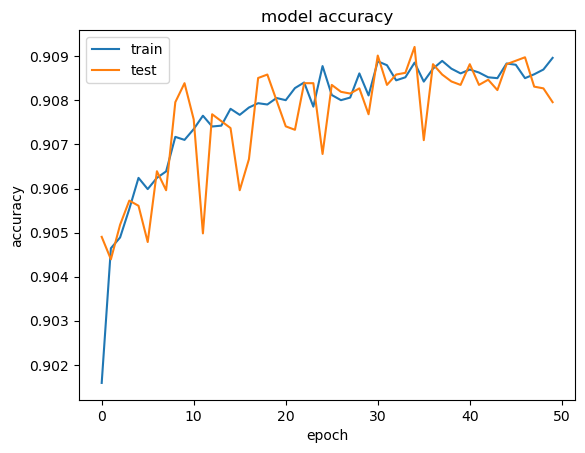

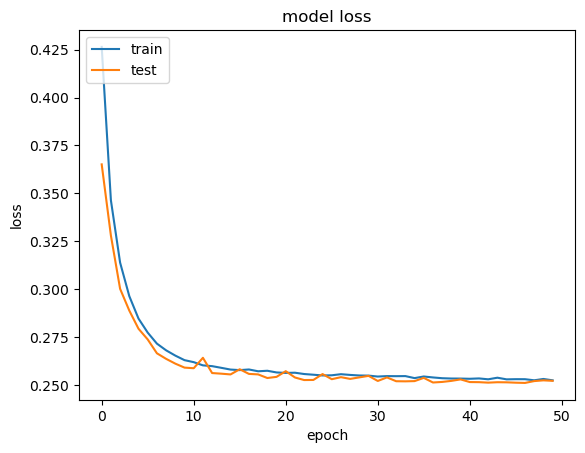

In [56]:
plot_training_data(history)